In [1]:
import natsort
import glob
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#glob.glob('underworld2/results/A/**/metrics.csv'), glob.glob('underworld2/results/A/**/solver.csv')
#glob.glob('underworld2/results/C/**/*.csv')

In [3]:
mHeaders = ['rmsint', 'shearArea' ,'shearPressure', 'backgroundArea', 'backgroundPressure', 
            'viscmin', 'viscmax', 'eiimin', 'eiimax', 'angle', 'vdint', 'shearVd', 'backgroundVd', 'pressmin', 'pressmax' ]

pHeaders = ['U0','a','asthenosphere','cohesion','depth','eta1','eta2','etaMin','fa','g','notchWidth','rho']

In [4]:
dataA = []
paramsA = []

metrics = natsort.natsorted(glob.glob('underworld2/results/A/**/metrics.csv'))
params = natsort.natsorted(glob.glob('underworld2/results/A/**/params.csv'))



for i in range(len(metrics)):
    d = pd.read_csv(metrics[i], header=None)
    d.columns = mHeaders
    p = pd.read_csv(params[i], header=None, skip_footer=1)
    p.columns = pHeaders 
    dataA.append(d)
    paramsA.append(p)

In [5]:
dataB = []
paramsB = []

metrics = natsort.natsorted(glob.glob('underworld2/results/B/**/metrics.csv'))
params = natsort.natsorted(glob.glob('underworld2/results/B/**/params.csv'))



for i in range(len(metrics)):
    d = pd.read_csv(metrics[i], header=None)
    d.columns = mHeaders
    p = pd.read_csv(params[i], header=None, skip_footer=1)
    p.columns = pHeaders 
    dataB.append(d)
    paramsB.append(p)

In [6]:
dataC = []
paramsC = []

metrics = natsort.natsorted(glob.glob('underworld2/results/C/**/metrics.csv'))
params = natsort.natsorted(glob.glob('underworld2/results/C/**/params.csv'))



for i in range(len(metrics)):
    d = pd.read_csv(metrics[i], header=None)
    d.columns = mHeaders
    p = pd.read_csv(params[i], header=None, skip_footer=1)
    p.columns = pHeaders 
    dataC.append(d)
    paramsC.append(p)
    
    
dataD = []
paramsD = []

metrics = natsort.natsorted(glob.glob('underworld2/results/D/**/metrics.csv'))
params = natsort.natsorted(glob.glob('underworld2/results/D/**/params.csv'))



for i in range(len(metrics)):
    d = pd.read_csv(metrics[i], header=None)
    d.columns = mHeaders
    p = pd.read_csv(params[i], header=None, skip_footer=1)
    p.columns = pHeaders 
    dataD.append(d)
    paramsD.append(p)

In [7]:
#mHeaders = ['rmsint', 'shearArea' ,'shearPressure', 'backgroundArea', 'backgroundPressure', 
#            'viscmin', 'viscmax', 'eiimin', 'eiimax', 'angle', 'vdint', 'shearVd', 'backgroundVd', 'pressmin', 'pressmax' ]

#pHeaders = ['a', 'eta0', 'eta1', 'eta2','asthenosphere','U0','cohesion', 'fa', 'etaMin', 'g', 'LS', 'rho','notchWidth']


dataG = []
paramsG = []

metrics = natsort.natsorted(glob.glob('underworld2/results/G/**/metrics.csv'))
params = natsort.natsorted(glob.glob('underworld2/results/G/**/params.csv'))



for i in range(len(metrics)):
    d = pd.read_csv(metrics[i], header=None)
    d.columns = mHeaders
    p = pd.read_csv(params[i], header=None, skip_footer=1)
    #p = p.ix[0]
    p.columns = pHeaders 
    dataG.append(d)
    paramsG.append(p)

In [8]:

#these changed for this model
pHeaders = ['U0', 'a', 'asthenosphere','cohesion','depth','eta1','eta2','etaMin','fa','g','lam','notchWidth','rho']

dataH = []
paramsH = []

metrics = natsort.natsorted(glob.glob('underworld2/results/H/**/metrics.csv'))
params = natsort.natsorted(glob.glob('underworld2/results/H/**/params.csv'))



for i in range(len(metrics)):
    d = pd.read_csv(metrics[i], header=None)
    d.columns = mHeaders
    p = pd.read_csv(params[i], header=None, skip_footer=1)
    #p = p.ix[0]
    p.columns = pHeaders 
    dataH.append(d)
    paramsH.append(p)

In [11]:
col = 'U0'
uniqs = np.unique([float(i[col][0]) for i in paramsA])
print(uniqs)

#colorMap = {}
#colorMap[uniqs[0]] = 'r'
#colorMap[uniqs[1]] = 'b'
#colorMap[uniqs[2]] = 'g'

[]


IndexError: list index out of range

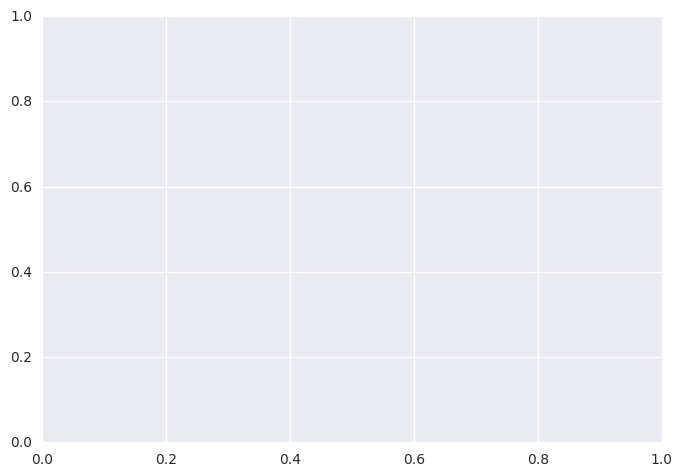

In [12]:
import seaborn as sns
fig, ax = plt.subplots()



ax.scatter(paramsA[0]['fa'][0], -1.*dataA[0]['angle'], c=colorMap[paramsA[0][col][0]], label='0.0025 cm/y - \n angle @ $2 \sigma$')
ax.scatter(paramsA[0]['fa'][0], -1.*dataA[1]['angle'], c=colorMap[paramsA[1][col][0]], label='0.01 cm/y -  \n angle @ $2 \sigma$')

ax.scatter(paramsA[0]['fa'][0], -1.*dataB[0]['angle'], c=colorMap[paramsB[0][col][0]], marker='s', label='0.0025 cm/y - \n angle @ $1 \sigma$')
ax.scatter(paramsA[0]['fa'][0], -1.*dataB[1]['angle'], c=colorMap[paramsB[1][col][0]], marker='s', label='0.01 cm/y -  \n angle @ $1 \sigma$')

ax.plot(np.array([0., 50.]), np.array([45., 45.]), c='k', lw=0.5,ls = '--', label='Roscoe')
ax.plot(np.array([0., 50.]), np.array([45., 25.]), c='k', lw=0.5,  label='Coulomb')
ax.plot(np.array([0., 50.]), np.array([45., 35.]), c='k', lw=0.5, ls = '-.',label='Arthur')

ax.legend(loc=3, ncol=3,prop={'size':6})

for i in range(1,len(dataB)):
    ax.scatter(paramsA[i]['fa'][0], -1.*dataA[i]['angle'],c=colorMap[paramsA[i][col][0]])
    ax.scatter(paramsB[i]['fa'][0], -1.*dataB[i]['angle'], c=colorMap[paramsB[i][col][0]], marker='s')

    #ax.plot(-1.*dataA[i]['angle'], c='r')
    #print(-1.*dataA[i]['angle'])
    #print(paramsA[i]['fa'])

#ax.scatter(paramsA[i]['fa'][0], -1.*dataA[i]['angle'], c='r',  label = 'Speigelman iso.')  



ax.set_ylim((25, 48))
ax.set_xlim((-1,45))
#ax.legend(loc=3, prop={'size':6})

ax.set_xlabel('friction angle ($\phi$)')
ax.set_ylabel('measured shear band angle')

ax.set_aspect('equal')


#fig.savefig('angles.png')

IndexError: list index out of range

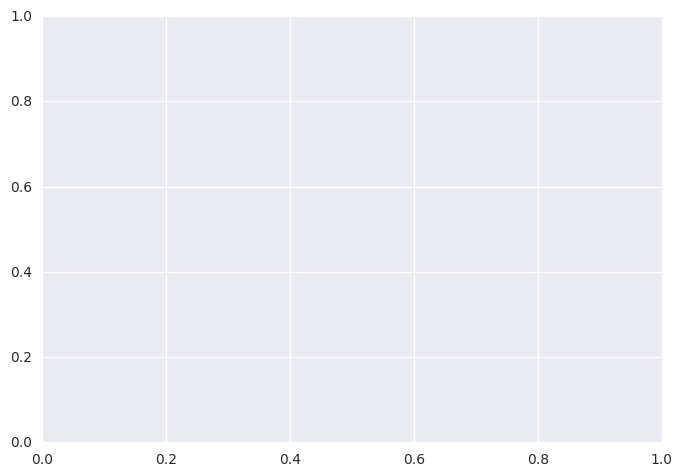

In [13]:
fig, ax = plt.subplots()

ax.scatter(paramsA[0]['fa'][0], dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r', label='isotropic plasticity')
#ax.scatter(paramsB[0]['fa'][0], dataB[i]['pressmax']- dataB[i]['pressmin'], c='b', label='transversely isotropic')
ax.legend(loc=3, prop={'size':8})

for i in range(1,len(dataA)):
    ax.scatter(paramsA[i]['fa'][0], dataA[i]['pressmax'] - dataA[i]['pressmin'], c='r')
    #ax.scatter(paramsA[i]['fa'][0], dataA[i]['shearPressure'], c='b')
    #ax.scatter(paramsB[i]['fa'][0], dataB[i]['pressmax']- dataB[i]['pressmin'] , c='b')
ax.set_xlabel('friction angle $\phi$')
ax.set_ylabel("$\Delta p'$")

#fig.savefig('pressures.png')

IndexError: list index out of range

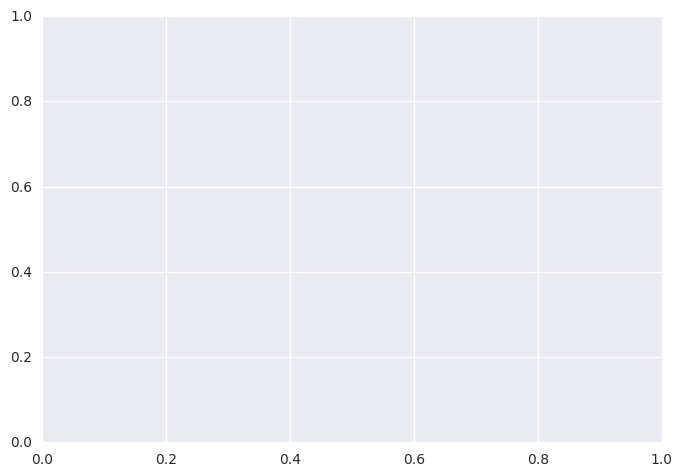

In [14]:
fig, ax = plt.subplots()

ax.scatter(paramsA[0]['fa'][0], dataA[i]['viscmin'], c='r', label='iso.')
#ax.scatter(paramsB[0]['fa'][0], dataB[i]['viscmin'], c='b', label='ti')
ax.legend(loc=3, prop={'size':8})

for i in range(1,len(dataB)):
    ax.scatter(paramsA[i]['fa'][0], dataA[i]['viscmin'], c='r')
    #ax.scatter(paramsB[i]['fa'][0], dataB[i]['viscmin'] , c='b')
ax.set_xlabel('friction angle $\phi$')
ax.set_ylabel("$\Delta p'$")

#fig.savefig('pressures.png')

In [15]:
#pd.options.display.float_format = '${:,.2f}'.format
#df.ix[0][['U0', 'eta1', 'asthenosphere']].to_latex('test_table.txt', float_format=lambda x: '%.2E' % x)
test = df.ix[0][['U0', 'eta1', 'asthenosphere']]
test.index = range(1, len(test.index ) + 1)
test.columns = [ 'vel. bc (m/s)', 'crust visc. (Pa.s)','viscous layer. (m)']
test.index 
test.to_latex('test_table.txt', float_format=lambda x: '%.2E' % x)

NameError: name 'df' is not defined

In [16]:
df.ix[0][['U0', 'eta1', 'asthenosphere']].to_latex

NameError: name 'df' is not defined

IndexError: list index out of range

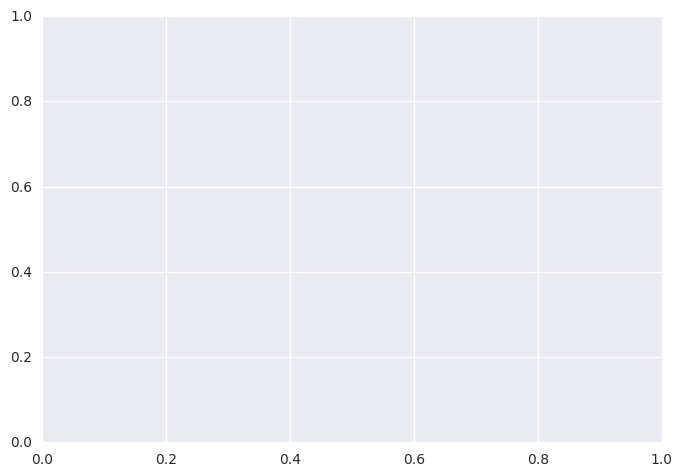

In [17]:
fig, ax = plt.subplots()

ax.scatter(paramsC[0]['a'][0], -1.*dataC[0]['angle'], c='r', label='isotropic plasticity')
ax.scatter(paramsD[0]['a'][0], -1.*dataD[0]['angle'], c='b', label='transversely isotropic')

ax.plot(np.array([0., 1.]), np.array([45. - (30/2.), 45. - (30/2.)]), c='k', lw=0.5, ls = '-.',label='Coulomb')
ax.plot(np.array([0., 1.]), np.array([45., 45.]), c='k', lw=0.5,ls = '--', label='Roscoe')


ax.legend(loc=3, prop={'size':8})

for i in range(1,len(dataC)):
    ax.scatter(paramsC[i]['a'][0], -1.*dataC[i]['angle'], c='r')
    ax.scatter(paramsD[i]['a'][0], -1.*dataD[i]['angle'], c='b')
    
    
ax.plot(np.array([0., 1.]), np.array([45. - (30/2.), 45. - (30/2.)]), c='k', lw=0.5, ls = '-.',label='Coulomb')


ax.set_ylim((20, 50))
ax.set_xlim((0, 1))

ax.set_xlabel('dynamic pressure factor $a $')
ax.set_ylabel('measured shear band angle')

#fig.savefig('alpha.png')

In [18]:
col = 'eta1'
uniqs = np.unique([float(i[col][0]) for i in paramsG])
print(uniqs)


colorMap = {}
colorMap[uniqs[0]] = 'r'
colorMap[uniqs[1]] = 'b'
colorMap[uniqs[2]] = 'g'
colorMap[uniqs[3]] = 'k'

[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [19]:
mar = 'U0'
uniqs = np.unique([float(i[mar ][0]) for i in paramsG])
print(uniqs)

mMap = {}
mMap[uniqs[0]] = '*'
mMap[uniqs[1]] = 'o'
mMap[uniqs[2]] = '+'

[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [20]:
lin = 'asthenosphere'
uniqs = np.unique([float(i[lin][0]) for i in paramsG])
print(uniqs)

lsMap = {}
lsMap[uniqs[0]] = '-.'
lsMap[uniqs[1]] = '--'
lsMap[uniqs[2]] = '-'

[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [21]:
siz = 'asthenosphere'
uniqs = np.unique([float(i[siz][0]) for i in paramsG])
print(uniqs)

sizMap = {}
sizMap[uniqs[0]] = 5.
sizMap[uniqs[1]] = 15
sizMap[uniqs[2]] = 35.

[]


IndexError: index 0 is out of bounds for axis 0 with size 0

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


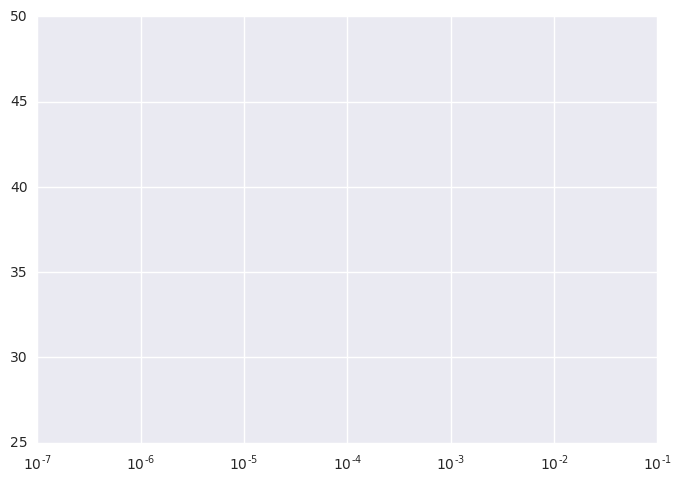

In [22]:
fig, ax = plt.subplots()

#ax.plot(np.array([0., 3e10]), np.array([45. - (15/4.), 45. - (15/4.)]), c=colorMap[15.0], lw=0.5, ls = '-.',label='Arthur')
#ax.plot(np.array([0., 3e10]), np.array([45. - (30/4.), 45. - (30/4.)]), lw=0.5, ls = '-.',label='Arthur')

ax.legend(loc=3, prop={'size':8})

for i in range(0,len(dataG)):
    #ax.scatter((paramsE[i]['U0'][0] * paramsE[i]['eta1'][0]/paramsE[i]['LS'][0]), dataE[i]['pressmax'] - dataE[i]['pressmin'], c='r')
    ax.scatter((paramsG[i]['U0'][0] * paramsG[i]['eta1'][0]/paramsG[i]['depth'][0]), -1.*dataG[i]['angle'], marker=mMap[paramsG[i][mar][0]], c=colorMap[paramsG[i][col][0]], label=str(i+1))

ax.set_ylim((25, 50))
ax.set_xscale('log')
#ax.set_xlim((0, 1e10))
 

ax.legend(loc='best', ncol=4,prop={'size':3})

In [23]:
sizMap[paramsG[i][siz][0]]

NameError: name 'i' is not defined

In [ ]:
fig, ax = plt.subplots()

#ax.scatter((paramsG[0]['U0'][1] * paramsG[0]['eta1'][1]), dataG[0]['pressmax']- dataG[0]['pressmin'] , \
#               marker=mMap[paramsG[0][mar][0]], s=sizMap[paramsG[0][siz][0]], \
#               c=colorMap[paramsG[0][col][0]], label=str(paramsG[0][col][1]) )



for i in range(0,len(dataG)):
    ax.scatter((paramsG[i]['U0'][1] * paramsG[i]['eta1'][1]), dataG[i]['pressmax']- dataG[i]['pressmin'] , \
               marker=mMap[paramsG[i][mar][0]], s=sizMap[paramsG[i][siz][0]], \
               c=colorMap[paramsG[i][col][0]], label=str(i + 1) )

#ax.set_ylim((1e-10, 1e-2))
#ax.set_xscale('log')
#ax.set_yscale('log')


ax.legend(loc=2, ncol=4,prop={'size':4})
#ax.set_aspect('equal')

ax.set_xlabel('$\eta_1 * U/L$')
ax.set_ylabel("$\Delta p'$")


fig.savefig('dyn_pressure.png')

0.1
0.001
1e-06
1e-09
1e-11


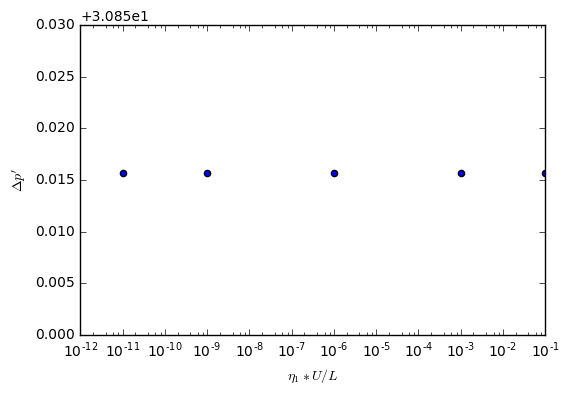

In [24]:
fig, ax = plt.subplots()

#ax.scatter((paramsG[0]['U0'][1] * paramsG[0]['eta1'][1]), dataG[0]['pressmax']- dataG[0]['pressmin'] , \
#               marker=mMap[paramsG[0][mar][0]], s=sizMap[paramsG[0][siz][0]], \
#               c=colorMap[paramsG[0][col][0]], label=str(paramsG[0][col][1]) )



for i in range(0,len(dataH)):
    ax.scatter(paramsH[i]['lam'][1], dataH[0]['pressmax']- dataH[0]['pressmin'] )
    print(paramsH[i]['lam'][1])

ax.set_xlim((1e-12, 1e-1))
ax.set_xscale('log')
#ax.set_yscale('log')


#ax.legend(loc=2, ncol=4,prop={'size':4})
#ax.set_aspect('equal')

ax.set_xlabel('$\eta_1 * U/L$')
ax.set_ylabel("$\Delta p'$")



## Solver stuff

In [73]:
res1 = []


for f in natsort.natsorted(glob.glob('underworld2/results/G/**/solver.csv')):
    #print(f)
    s = np.loadtxt(f, delimiter=',')
    res1.append(s[0])

In [74]:
lsMap[paramsG[i][lin][0]], mMap[paramsG[i][mar][0]],

('-', '*')

IndexError: list index out of range

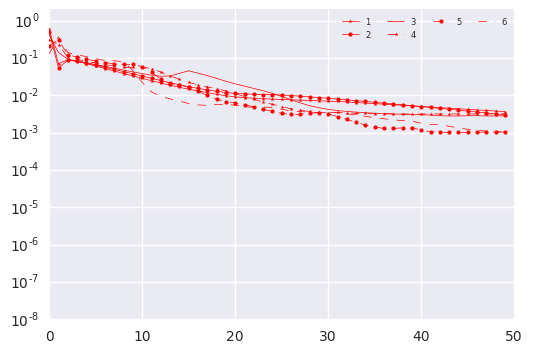

In [82]:
#cmap = mpl.cm.autumn
fig, ax = plt.subplots()
for i in range(0,len(res1)):
    ax.plot(range(len(res1[i])), res1[i],c=colorMap[paramsG[i][col][0]],marker=mMap[paramsG[i][mar][0]], ls=lsMap[paramsG[i][lin][0]], lw=0.5,  markersize=3.,label=str(i+1))
    #print( cmap(i))

    ax.set_yscale('log')
    #ax.set_xscale('log')
ax.legend(loc=1, ncol=4,prop={'size':6})

ax.set_ylim(1e-8,2.)
ax.set_xlim(0,50.)

colm = 23
ax.plot(range(len(res1[colm -1  ])), res1[colm -1],c=colorMap[paramsG[colm -1][col][0]],marker=mMap[paramsG[colm -1 ][mar][0]], ls='-', lw=2.5,  markersize=4.,label=str(colm ))


fig.savefig('big_solve.png')

In [77]:
resC = []


for f in natsort.natsorted(glob.glob('underworld2/results/C/**/solver.csv')):
    #print(f)
    s = np.loadtxt(f, delimiter=',')
    resC.append(s[0])
    
resD = []


for f in natsort.natsorted(glob.glob('underworld2/results/D/**/solver.csv')):
    #print(f)
    s = np.loadtxt(f, delimiter=',')
    resD.append(s[0])

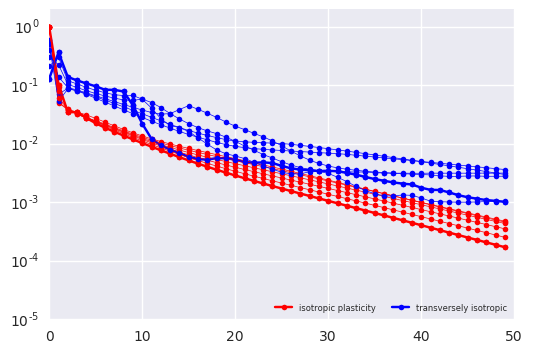

In [89]:



#cmap = mpl.cm.autumn
fig, ax = plt.subplots()

ax.plot(range(len(resC[i])), resC[i],c='r', marker='o',markersize=4.0,label='isotropic plasticity')
ax.plot(range(len(resC[i])), resD[i],c='b', marker='o',markersize=4.0, label='transversely isotropic')


for i in range(0,len(resC)):
    ax.plot(range(len(resC[i])), resC[i],c='r', marker='o',markersize=4.0, lw=0.5)
    ax.plot(range(len(resC[i])), resD[i],c='b', marker='o',markersize=4.0, lw=0.5)
    #print( cmap(i))

    ax.set_yscale('log')
    #ax.set_xscale('log')
ax.legend(loc=4, ncol=4,prop={'size':6})

ax.set_ylim(1e-5,2.)
ax.set_xlim(0,50.)

colm = 23
#ax.plot(range(len(res1[colm -1  ])), res1[colm -1],c=colorMap[paramsG[colm -1][col][0]],marker=mMap[paramsG[colm -1 ][mar][0]], ls='-', lw=2.5,  markersize=4.,label=str(colm ))


fig.savefig('little_solve.png')